In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize as som
%matplotlib inline
import os
import glob

In [23]:
CURR_DIR = os.getcwd()
data_files = glob.glob(CURR_DIR + "/**/*.csv")
data_files

['/home/graviton/Documents/Learning/Python/Project_Dust-Distribution-in-ISM/Data/project_doc.csv',
 '/home/graviton/Documents/Learning/Python/Project_Dust-Distribution-in-ISM/Data/helix_doc.csv',
 '/home/graviton/Documents/Learning/Python/Project_Dust-Distribution-in-ISM/Data/helix_final.csv']

In [24]:
df = pd.read_csv(data_files[0])
df.head(10)
#df.dtypes
#len(df)
#np.mean(df.longitude), np.mean(df.latitude)

,hour,min,sec,ra,deg,arcmin,arcsec,dec,f100,f60,ratio,Temp,planck,Mass
0,4,1,23.37,60.347375,-74,6,26.2,-74.107278,5.2847,0.1974,0.037353,16.434228,6.251730e-17,3.336790e+25
1,4,1,20.51,60.335458,-74,5,9.3,-74.085917,5.2828,0.1932,0.036572,16.374949,6.056620e-17,3.443040e+25
2,4,1,16.42,60.318417,-74,3,23.0,-74.056389,5.3288,0.2264,0.042486,16.804645,7.583060e-17,2.773920e+25
3,4,1,14.10,60.308750,-74,1,59.1,-74.033083,5.4399,0.2474,0.045479,17.007292,8.397870e-17,2.557000e+25
4,4,1,11.32,60.297167,-74,0,33.7,-74.009361,5.5568,0.2381,0.042848,16.829660,7.680220e-17,2.856010e+25
5,4,1,7.81,60.282542,-73,59,0.5,-73.983472,5.7198,0.2836,0.049582,17.271616,9.559230e-17,2.361930e+25
6,4,1,6.11,60.275458,-73,57,41.2,-73.961444,5.9029,0.2539,0.043013,16.840963,7.724430e-17,3.016530e+25
7,4,1,4.14,60.267250,-73,56,15.3,-73.937583,6.0612,0.2764,0.045602,17.015417,8.431880e-17,2.837550e+25
8,4,0,59.47,60.247792,-73,54,32.9,-73.909139,6.1533,0.2867,0.046593,17.080527,8.708220e-17,2.789250e+25
9,4,0,58.11,60.242125,-73,53,11.6,-73.886556,6.1774,0.3436,0.055622,17.636352,1.135740e-16,2.147010e+25


In [13]:
#np.max(df.longitude), np.min(df.longitude)
np.max(df.ra), np.min(df.ra)
#np.max(df.f100), np.max(df.f60)

(60.99229167, 58.72733333)

### Scatter Plot

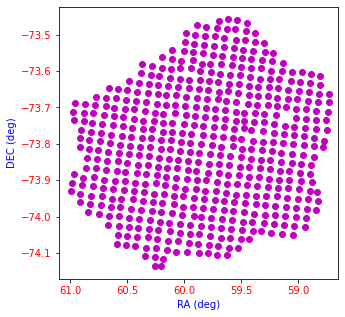

In [17]:
plt.figure(figsize=[5,5]) #it defines the size of figure 
plt.plot(df.ra, df.dec,'o',color='m')
plt.xlim(61.10, 58.65)
plt.xlabel('RA (deg)', color='b', fontsize=10)
plt.ylabel('DEC (deg)',color='b', fontsize=10)
plt.xticks(color = 'r', fontsize=10)
plt.yticks(color = 'r', fontsize=10)
#plt.savefig('Figure/1RADECL.png', dpi=300)
plt.show()

### Calculation of statistical values

In [18]:
np.mean(df.Temp), max(df.Temp),min(df.Temp), np.std(df.Temp)/np.sqrt(len(df.Temp)), max(df.Temp)-min(df.Temp)

(17.433040490209525,
 20.29617156,
 14.94899819,
 0.04053680406340442,
 5.347173370000002)

In [19]:
np.sum(df.Mass), 200*np.sum(df.Mass), np.sum(df.Mass)/(1.989*10**30) ,200*np.sum(df.Mass)/(1.989*10**30) 

(1.3387028309999998e+28,
 2.677405662e+30,
 0.006730532081447962,
 1.3461064162895926)

In [20]:
np.std(df.Temp), np.std(df.Mass)

(0.9288148652607211, 1.136130525843717e+25)

In [21]:
SE = np.std(df.Temp)/np.sqrt(len(df.Temp)) # Standard error = standard deviation/square root of n
SE

0.04053680406340442

### Best Fitted Straight Line 
#### Fitting between flux at 60 micron and 100 micron

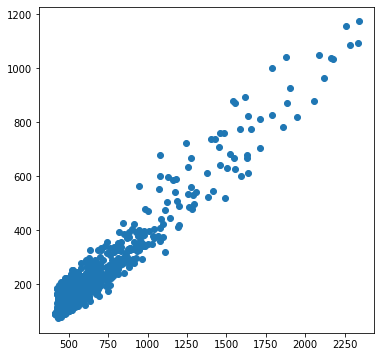

In [9]:
plt.figure(figsize=[6,6])
plt.plot(df.f100, df.f60, 'o')

In [13]:
def straight_line(x, m, c):
    y = m*x + c
    return y

(array([   0.53592602, -132.10827385]),
 array([[ 1.70967300e-05, -1.06189893e-02],
        [-1.06189893e-02,  7.97042443e+00]]))

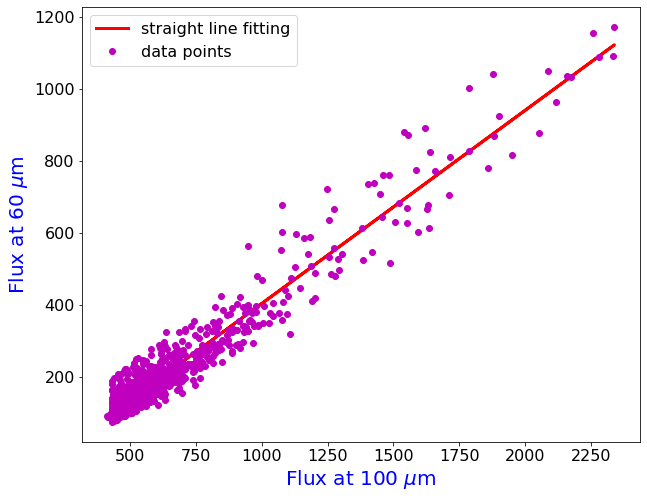

In [34]:
plt.figure(figsize=[10,8])
popt, pcov = som.curve_fit(straight_line, df.f100, df.f60)
# where popt: optimal parameter, pcov : corresponding error in parameter
yfit_straight_line_model = straight_line(df.f100, popt[0], popt[1])
plt.plot(df.f100, yfit_straight_line_model, label='straight line fitting',color = 'r', lw = 3)
plt.plot(df.f100, df.f60,'o',color = 'm', label='data points')
plt.xlabel('Flux at 100 $\mu$m',fontsize=20, color = 'b')
plt.ylabel('Flux at 60 $\mu$m',fontsize=20,color = 'b' )
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('f100f60.png', dpi = 300)
popt, pcov

In [15]:
Temp = -96/(np.log(0.53592602*0.6**5))
Temp

30.208749362157604

In [16]:
np.mean(df.Temp)

25.43359101192965

In [17]:
np.max(df.longitude), np.min(df.longitude), np.max(df.latitude), np.min(df.latitude)

(54.26844000000001, 52.79859, 0.48109, -0.3514)

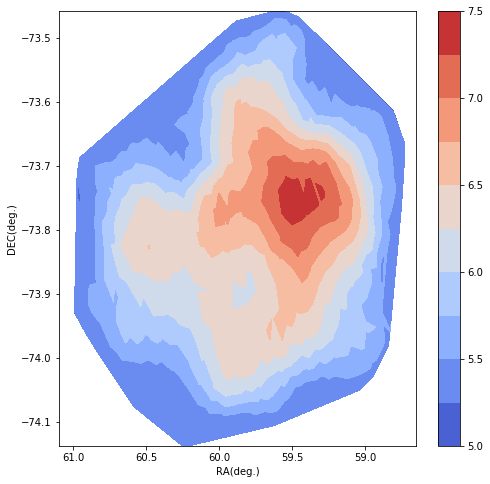

In [15]:
plt.figure(figsize=(8,8))
plt.tricontourf(df.ra, df.dec, df.f100, levels=8, cmap='coolwarm')
plt.colorbar()
#plt.clabel(r'F60($\mu$m)')
plt.xlim(61.10, 58.65)
plt.xlabel('RA(deg.)')
plt.ylabel('DEC(deg.)')
plt.savefig('F100.png')

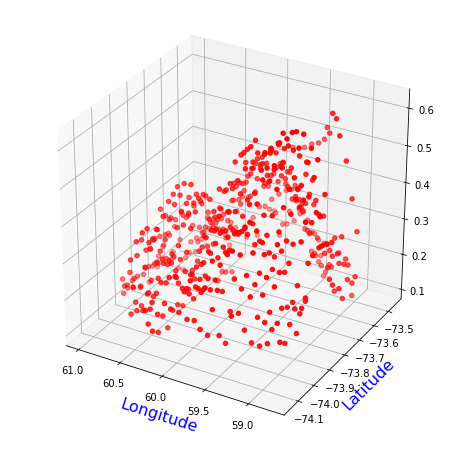

In [16]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = [8,8])

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.ra, df.dec, df.f60,'.',color='r')
plt.xlim(61.10, 58.65)
plt.xlabel('Longitude', color='b', fontsize=16)
plt.ylabel('Latitude', color='b', fontsize=16)
plt.savefig('3DAll.png')


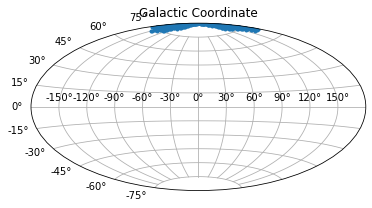

In [19]:
plt.figure(figsize = [6,6])
plt.subplot(111, projection="aitoff")
plt.title("Galactic Coordinate")
plt.plot(df.ra, df.dec,'.')
plt.grid(True)
#plt.savefig('Figure/GalCo.png', dpi= 300)

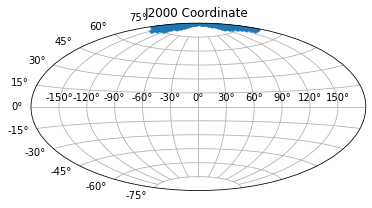

In [20]:
plt.figure(figsize = [6,6])
plt.subplot(111, projection="aitoff")
plt.title("J2000 Coordinate ")
plt.plot(df.ra, df.dec,'.')
plt.grid(True)
#plt.savefig('Figure/RADEC.png', dpi = 300)

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r


(61.1, 58.65)

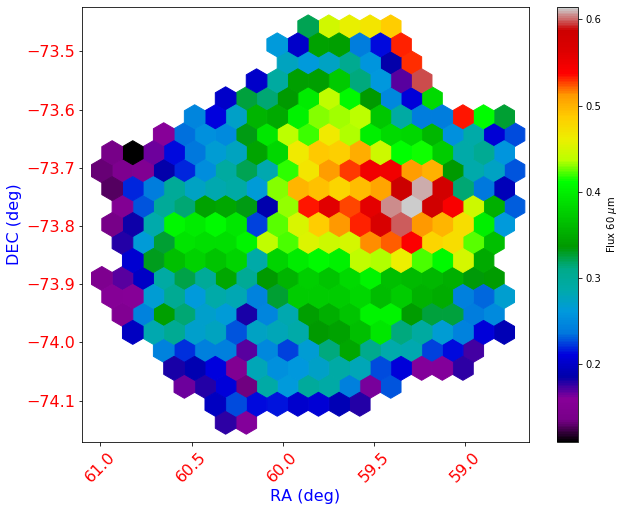

In [26]:
plt.figure(figsize=(10, 8))
plt.hexbin(df.ra, df.dec, df.f60, gridsize=(20),cmap='nipy_spectral')#gist_stern') #gist_rainbow_r, nipy_spectral
plt.colorbar(label = 'Flux 60 $\mu$m')
plt.xticks(rotation = 45,color = 'r',fontsize = 16)
plt.yticks(color = 'r', fontsize = 16)
plt.xlabel('RA (deg)', color = 'b', fontsize = 16)
plt.ylabel('DEC (deg)', color = 'b', fontsize = 16)
plt.xlim(61.10, 58.65)
#plt.savefig('Figure/SNF60.png',dpi = 400)

(61.1, 58.65)

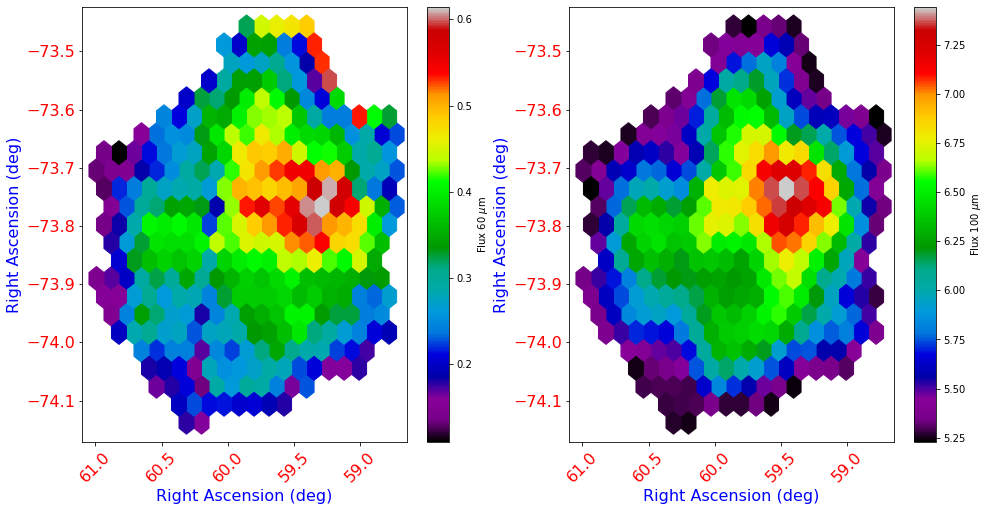

In [27]:
#hexbin
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.hexbin(df.ra, df.dec, df.f60, gridsize=(20),cmap='nipy_spectral')#gist_stern') #gist_rainbow_r, nipy_spectral
plt.colorbar(label = 'Flux 60 $\mu$m')
plt.xticks(rotation = 45,color = 'r',fontsize = 16)
plt.yticks(color = 'r',fontsize = 16)
plt.xlabel('Right Ascension (deg)', color = 'b', fontsize = 16)
plt.ylabel('Right Ascension (deg)', color = 'b', fontsize = 16)
plt.xlim(61.10, 58.65)
#plt.savefig('Figure/ColorF100.png', dpi = 400)
plt.subplot(122)
plt.hexbin(df.ra, df.dec, df.f100, gridsize=(20),cmap='nipy_spectral')
plt.colorbar(label = 'Flux 100 $\mu$m')
plt.xticks(rotation = 45, color = 'r',fontsize = 16)
plt.yticks(color = 'r',fontsize = 16)
plt.xlabel('Right Ascension (deg)', color = 'b', fontsize = 16)
plt.ylabel('Right Ascension (deg)', color = 'b', fontsize = 16)
plt.xlim(61.10, 58.65)
#plt.savefig('F60F100.png', dpi = 800) #dpi = resolution

(61.1, 58.65)

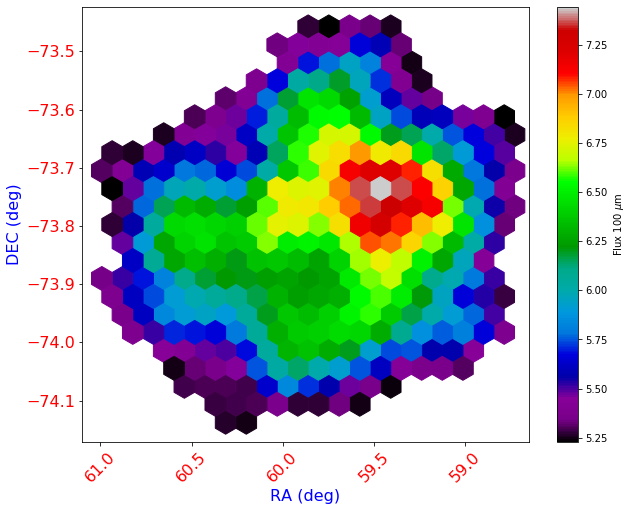

In [28]:
plt.figure(figsize=(10,8))
plt.hexbin(df.ra, df.dec, df.f100, gridsize=(20),cmap='nipy_spectral')
plt.colorbar(label = 'Flux 100 $\mu$m')
plt.xticks(rotation = 45,color = 'r',fontsize = 16)
plt.yticks(color = 'r',fontsize = 16)
plt.xlabel('RA (deg)', color = 'b', fontsize = 16)
plt.ylabel('DEC (deg)', color = 'b', fontsize = 16)
plt.xlim(61.10, 58.65)
#plt.savefig('Figure/SNF100.png', dpi = 400)
#plt.ylim(-2.70,-1.45)

(61.1, 58.65)

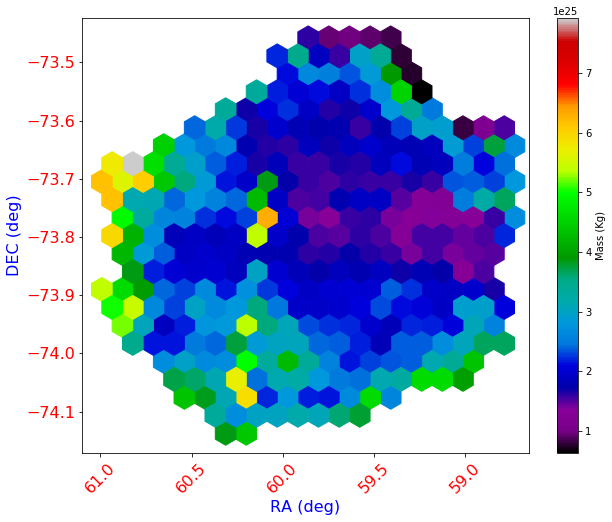

In [29]:
plt.figure(figsize=(10,8))
plt.hexbin(df.ra, df.dec, df.Mass, gridsize=(20),cmap='nipy_spectral')
plt.colorbar(label = 'Mass (Kg)') #nipy_spectral
plt.xticks(rotation = 45, color = 'r',fontsize = 16)
plt.yticks(color = 'r',fontsize = 16)
plt.xlabel('RA (deg)', color = 'b', fontsize = 16)
plt.ylabel('DEC (deg)', color = 'b', fontsize = 16)
plt.xlim(61.10, 58.65)
#plt.savefig('Figure/SNMass.png', dpi = 400)

## Histogram and Gaussian Fit

# Gaussian fit for temperature 

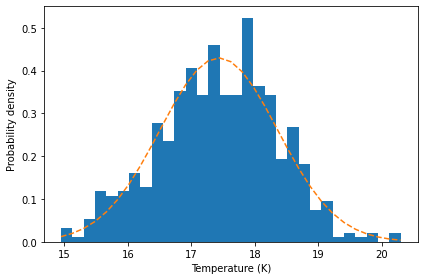

In [28]:

#np.random.seed(19680801)

# example data
mu = np.mean(df.Temp)  # mean of distribution
sigma = np.std(df.Temp)  # standard deviation of distribution
x = df.Temp

num_bins = 30

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Probability density')
#ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


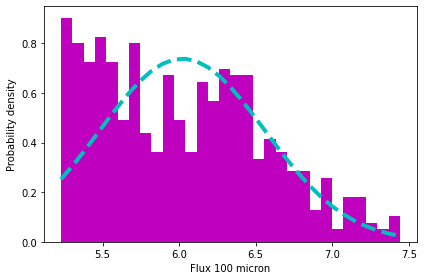

In [27]:
#np.random.seed(19680801)

# example data
mu = np.mean(df.f100)  # mean of distribution
sigma = np.std(df.f100)  # standard deviation of distribution
x = df.f100

num_bins = 30

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True,color = 'm')

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--c', lw=4)
ax.set_xlabel('Flux 100 micron')
ax.set_ylabel('Probability density')
#ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


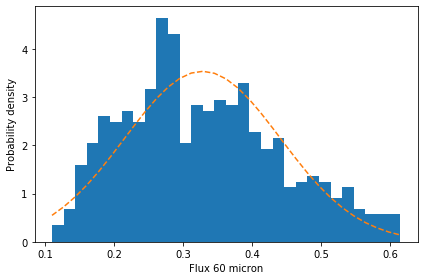

In [36]:
#np.random.seed(19680801)

# example data
mu = np.mean(df.f60)  # mean of distribution
sigma = np.std(df.f60)  # standard deviation of distribution
x = df.f60

num_bins = 30

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Flux 60 micron')
ax.set_ylabel('Probability density')
#ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# Gaussian fit for Mass

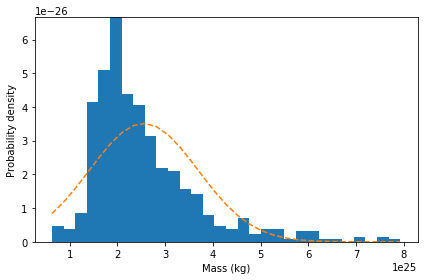

In [33]:
np.random.seed(19680801)

# example data
mu = np.mean(df.Mass)  # mean of distribution
sigma = np.std(df.Mass)  # standard deviation of distribution
x = df.Mass

num_bins = 30

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Mass (kg)')
ax.set_ylabel('Probability density')
#ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()